[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visdesignlab/intent-system-data-notebook/blob/master/Data%20Generation%20Notebook.ipynb)

Some required packages

In [1]:
# !pip3 install altair

Import all the packages we will be using.

In [2]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

import numpy as np
import random
from IPython.display import display
from random import randint
from random import uniform
from sklearn.cluster import KMeans

import requests
import json

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification 
import pprint

In [3]:
# Plot properties
# def my_theme(*args, **kwargs):
#     return {'width': 500, 'height': 500}
  
# alt.themes.register('custom-size', my_theme)
# alt.themes.enable('custom-size')

# Data Generation

In [4]:
# Helper function

def print_ground(data, col, val):
  print("Ground Truth:", data.index[data[col] == val].tolist())

## Cluster

Number of clusters: 3 and 4. mix the centroids

### Generation

In [5]:
def createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, clusterCenters=None, useCategories=False):
  cluster_dataset = None

  # for i in range(seedStart, seedStart + 3):

  if clusterCenters == None:
      x,y = make_blobs(n_samples=samples+outliers, n_features=2, centers=centerNum, cluster_std=stdDev, random_state = seedStart if useSeed else None)
  else:
      x,y = make_blobs(n_samples=samples+outliers, n_features=2, centers=clusterCenters, cluster_std=stdDev, random_state = seedStart if useSeed else None)

  y = y.reshape((samples+outliers,1))
  data = pd.DataFrame(np.hstack((x,y)), columns=["X", "Y", "Cluster"])

  if outliers > 0:
    maxX = data["X"].max()
    minX = data["X"].min()
      
    maxY = data["Y"].max()
    minY = data["Y"].min()

    for i in range(0, outliers):
      while(True):
        xVal = random.uniform(minX, maxX)
        yVal = random.uniform(minY, maxY)
        
        # You could also change the numbers inside of this line to be bigger/smaller than 1 if you want the outliers to be further/closer to the clusters
        if(data.loc[(data["X"] - 1 < xVal) & (data["X"] + 1 > xVal) & (data["Y"] - 1 < yVal) & (data["Y"] + 1 > yVal)].shape[0] == 0):
          data.loc[samples+i, ("X")] = xVal
          data.loc[samples+i, ("Y")] = yVal
          data.loc[samples+i, ("Cluster")] = centerNum
          break

  shiftX = 0
  shiftY = 0

  if data["X"].min() < 0:
    shiftX = abs(data["X"].min())
    data["X"] += shiftX
    # for j in range(0, len(clusterCenters)):
    #   clusterCenters[j][0] += shiftX


  if data["Y"].min() < 0:
    shiftY = abs(data["Y"].min())
    data["Y"] += shiftY
    # for j in range(0, len(clusterCenters)):
    #   clusterCenters[j][1] += shiftY

  if useCategories:    
    subject_map = {
      0: "Circle",
      1: "Cross",
      2: "Diamond",
      3: "Square"
    }

    data['Cluster'] = data['Cluster'].map(subject_map)

  return data, clusterCenters

### Easy

In [6]:
centerNum = 3
samples = 200
stdDev = 1
useSeed = True
seedStart = 8
outliers = 0

cluster_dataset_easy1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[2.65, 2.1], [15.4, 21.23], [15.33, 12.31]])

cet = alt.Chart(cluster_dataset_easy1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy Training'
)

cluster_easy_training_1 = cluster_dataset_easy1
data = cluster_dataset_easy1


In [7]:
centerNum = 4
samples = 200
stdDev = 1
useSeed = True
seedStart = 8
outliers = 0

centers = [[6.3, 10.4], [15.31, 21.74], [2.33, 2.47], [14.99, 12.98]]

# cluster_dataset_easy2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers)
cluster_dataset_easy2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)

data = cluster_dataset_easy2
cluster_easy_task_1 = cluster_dataset_easy2

ce1 = alt.Chart(cluster_dataset_easy2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy 1'
)

In [8]:
centerNum = 4
samples = 200
stdDev = 1
useSeed = True
seedStart = 10
outliers = 0


centers =[[1.895, 16.845], [13.25, 2.13], [10.59, 16.65], [7.72, 6.2]]

cluster_dataset_easy3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)



data = cluster_dataset_easy3

cluster_easy_task_2 = cluster_dataset_easy3

ce2 = alt.Chart(cluster_dataset_easy3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Easy 2'
)

In [9]:
ce = alt.hconcat(*[cet, ce1,ce2]).resolve_scale(color='independent')

### Medium

In [10]:
centerNum = 3
samples = 200
stdDev = 2.1
useSeed = True
seedStart = 8
outliers = 0

centers = [[18.16, 14.28], [5.56, 4.41], [18.31, 23.41]]

cluster_dataset_med1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)


cluster_med_training_1 = cluster_dataset_med1


cmt = alt.Chart(cluster_dataset_med1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium Training'
)

In [11]:
centerNum = 3
samples = 200
stdDev = 1.6
useSeed = True
seedStart = 20
outliers = 0

centers = [[14.38, 7.78], [3.33, 4.12], [20.68, 6.34]]


cluster_dataset_med2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, centers)




cluster_med_task_1 = cluster_dataset_med2

cm1 = alt.Chart(cluster_dataset_med2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium 1'
)


In [12]:
centerNum = 4
samples = 200
stdDev = 1.6
useSeed = True
seedStart = 21
outliers = 0

cluster_dataset_med3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[17.68, 3.55], [4.58, 9.19], [9.63, 16.69], [8.06, 3.67]])

cluster_med_task_2=cluster_dataset_med3

cm2 = alt.Chart(cluster_dataset_med3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title='Medium 2'
)


In [13]:
cm = alt.hconcat(*[cmt, cm1,cm2]).resolve_scale(color='independent')

### Hard

In [14]:
centerNum = 3
samples = 200
stdDev = 3.8
useSeed = True
seedStart = 8
outliers = 0

cluster_dataset_hard1, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[23.04, 27.87], [10, 7.86], [22.2, 17.51]])

cluster_hard_training_1 = cluster_dataset_hard1

cht = alt.Chart(cluster_dataset_hard1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard Training"
)

In [15]:
centerNum = 3
samples = 200
stdDev = 2.8
useSeed = True
seedStart = 17
outliers = 0

cluster_dataset_hard2, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[6.55, 5.62], [17.86, 17.34], [8.48, 15.22]])

cluster_hard_task_1 = cluster_dataset_hard2

ch1 = alt.Chart(cluster_dataset_hard2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard 1"
)

In [16]:
centerNum = 4
samples = 200
stdDev = 1.8
useSeed = True
seedStart = 20
outliers = 0

# cluster_dataset_hard3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers)
cluster_dataset_hard3, centers = createCluster(centerNum, samples, stdDev, useSeed, seedStart, outliers, [[4.33, 6.6], [15.71, 10.56], [11.68, 3.18], [22.25, 8.7]])

cluster_hard_task_2 = cluster_dataset_hard3

ch2 = alt.Chart(cluster_dataset_hard3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
).properties(
    title="Hard 2"
)

In [17]:
ch = alt.hconcat(*[cht, ch1,ch2]).resolve_scale(color='independent')

## Cluster datasets

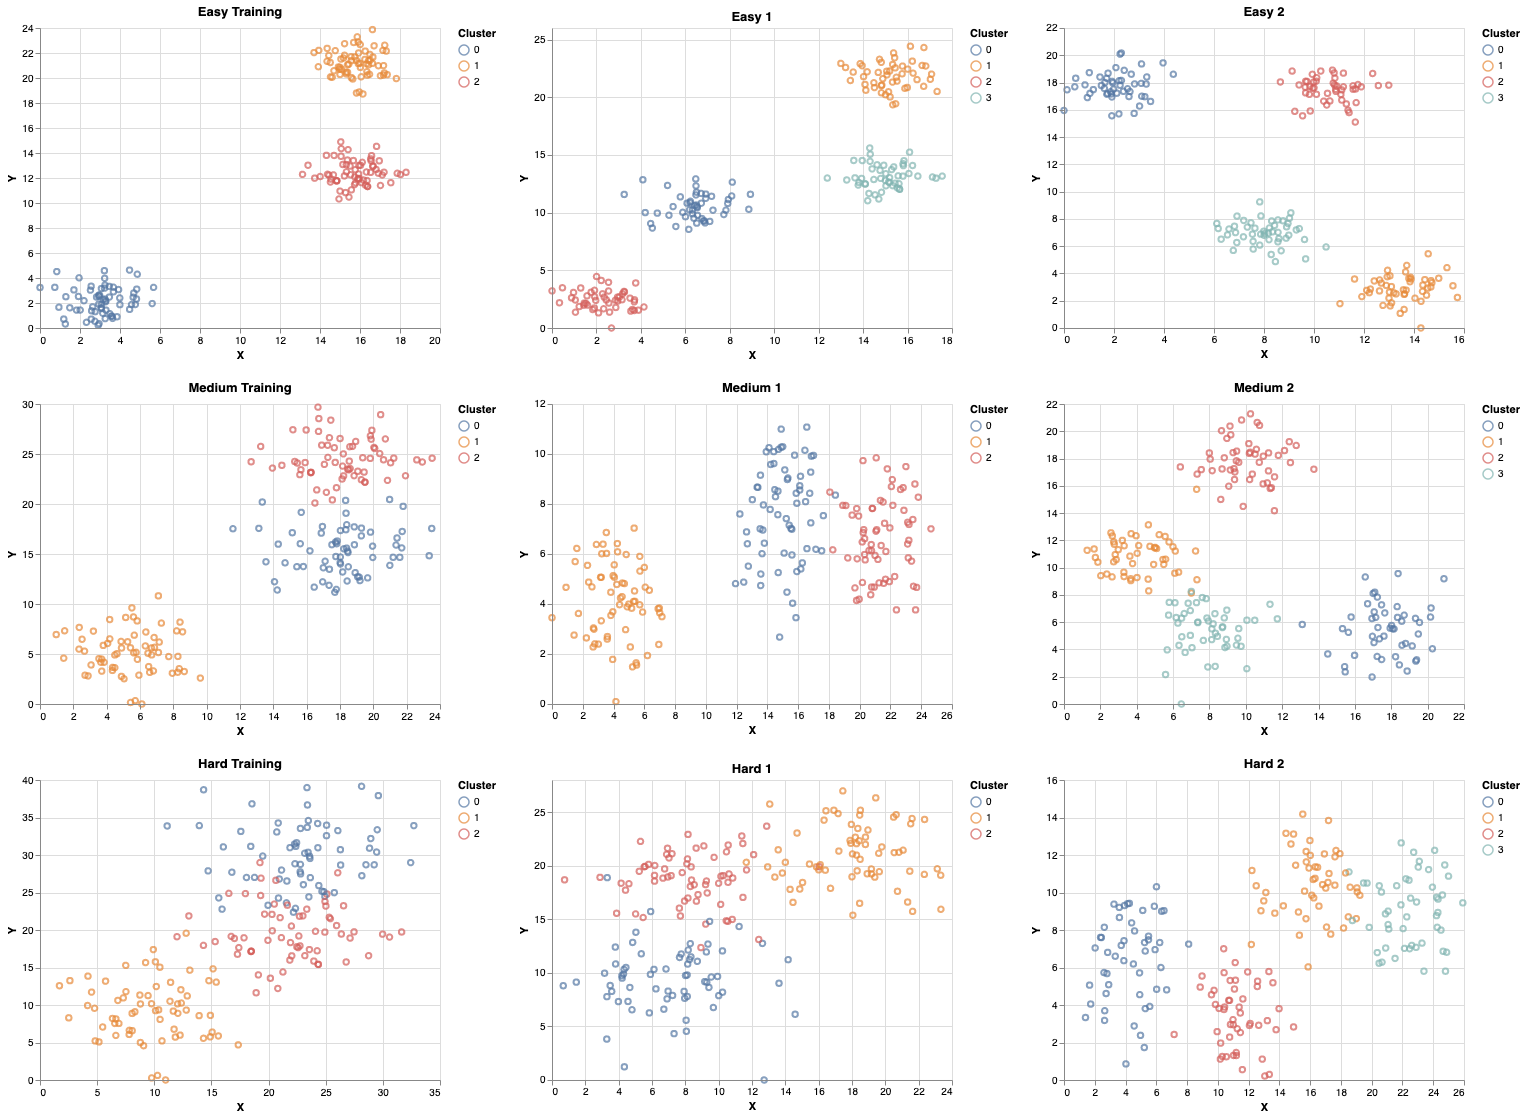

In [18]:
alt.vconcat(*[ce, cm, ch])

## Skyline

Number of clusters: 3 and 4. mix the centroids

### Generation

In [19]:
def findMinSkyline(data):
  skylineList = []

  for i in range(0, len(data.index)):
    if data.iloc[i]["Y"] < data.loc[data["X"] < data.iloc[i]["X"]]["Y"].min() or data.iloc[i]["X"] == data["X"].min():
      skylineList.append(i)
      
  return skylineList


## Skyline algorithm (for max skyline) starts at the max x value, randomly chooses x value below that to put a new point
## (ensuring enough room for the rest of the skylines). From that point, call it currX, finds the max y of any x value > currX. 
## The skyline point has to have a y higher than this, so a y is randomly generated. This y value is greater than the previous high somewhere
## between a range which is changeable below, currently between .2 and .4 higher. Now find a new x lower than the one you just did, and repeat. 
## This same process is done for min/min, just reversed. 



def createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed):  

  random.seed(skylineSeed)

  x,y = make_blobs(n_samples=samples+skylineMax + skylineMin, n_features=2, centers=centerNum, cluster_std=stdDev, random_state = seedStart if useSeed else None)
  y = y.reshape((samples+skylineMax+skylineMin,1))
  data = pd.DataFrame(np.hstack((x,y)), columns=["X", "Y", "Cluster"])

  if skylineMax > 0:
    maxX = data["X"].max()
    minX = data["X"].min()

    currRange = (maxX - minX) / skylineMax
    prevSkyline = maxX
    for i in range(0, skylineMax):
      currX = random.uniform(prevSkyline - currRange, prevSkyline)
      prevSkyline = currX

      highY = data.loc[data["X"] > currX]["Y"].max()

      data.loc[samples+i, ("X")] = currX
      
      ## change the numbers being added to highY to higher numbers to make max skyline more obvious, lower for less
      data.loc[samples+i, ("Y")] = random.uniform(highY + .2, highY + .4)
      data.loc[samples+i, "Cluster"] = 1
      

  if skylineMin > 0:
    maxX = data["X"].max()
    minX = data["X"].min()

    currRange = (maxX - minX) / skylineMin
    prevSkyline = minX
    for i in range(0, skylineMin):
      currX = random.uniform(prevSkyline, prevSkyline + currRange)
      prevSkyline = currX

      lowY = data.loc[data["X"] < currX]["Y"].min()

      data.loc[samples+skylineMax +i, ("X")] = currX

      ## change the numbers being subtracted from lowY to higher numbers to make min skyline more obvious, lower for less
      data.loc[samples+skylineMax+i, ("Y")] = random.uniform(lowY - .2, lowY - .4)

  if data["X"].min() < 0:
    data["X"] += abs(data["X"].min())

  if data["Y"].min() < 0:
    data["Y"] += (abs(data["Y"].min()) + .7)

  for i in range(0, samples+skylineMin+skylineMax):
    data.loc[i, ("Label")] = "Hotel " + str(i)

  skyList=findMinSkyline(data)
  print(skyList)
  for j in range(0, len(skyList)):
    data.loc[skyList[j], ("Cluster")] = 1


  data["Y"] += data["Y"] * 100

  data.columns = ['Distance', 'Cost Per Night', 'Cluster', 'Label']


  return data

### Easy

In [20]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 0.7
useSeed = True
seedStart = 13
skylineMax = 0
skylineMin = 5

skylineSeed = 11


### END

skyDataEasy1 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skyet = alt.Chart(skyDataEasy1).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[143, 150, 180, 200, 201, 202, 203, 204]


In [21]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 0.9
useSeed = True
seedStart = 10
skylineMax = 0
skylineMin = 7

skylineSeed = 14


### END

skyDataEasy2 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skye1 = alt.Chart(skyDataEasy2).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)

sky_easy_task_1 = skyDataEasy2

[61, 83, 111, 200, 201, 202, 203, 204, 205, 206]


In [22]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 0.5
useSeed = True
seedStart = 5
skylineMax = 0
skylineMin = 7

skylineSeed = 15


### END

skyDataEasy3 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skye2 = alt.Chart(skyDataEasy3).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[127, 200, 201, 202, 203, 204, 205, 206]


In [23]:
skye = alt.hconcat(*[skyet, skye1,skye2]).resolve_scale(color='independent')

### Medium

In [24]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 1.3
useSeed = True
seedStart = 13
skylineMax = 0
skylineMin = 5

skylineSeed = 11


### END

skyDataMed1 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skymt = alt.Chart(skyDataMed1).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)

[28, 99, 143, 150, 180, 200, 201, 202, 203, 204]


In [25]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 1
useSeed = True
seedStart = 25
skylineMax = 0
skylineMin = 4

skylineSeed = 21


### END

skyDataMed2 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skym1 = alt.Chart(skyDataMed2).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[14, 28, 76, 172, 191, 200, 201, 202, 203]


In [26]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = .8
useSeed = True
seedStart = 3
skylineMax = 0
skylineMin = 4

skylineSeed = 22


### END

skyDataMed3 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skym2 = alt.Chart(skyDataMed3).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[9, 80, 153, 192, 200, 201, 202, 203]


In [27]:
skym = alt.hconcat(*[skymt, skym1,skym2]).resolve_scale(color='independent')

### Hard

In [28]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 2
useSeed = True
seedStart = 13
skylineMax = 0
skylineMin = 3

skylineSeed = 11


### END

skyDataHard1 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skyht = alt.Chart(skyDataHard1).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)



[4, 34, 134, 141, 144, 158, 164, 200, 201, 202]


In [29]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 2
useSeed = True
seedStart = 5
skylineMax = 0
skylineMin = 3

skylineSeed = 17


### END

skyDataHard2 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skyh1 = alt.Chart(skyDataHard2).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[55, 86, 114, 155, 178, 190, 200, 201, 202]


In [30]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 2
useSeed = True
seedStart = 20
skylineMax = 0
skylineMin = 8

skylineSeed = 7


### END

skyDataHard3 = createSkyline(centerNum, samples, stdDev, useSeed, seedStart, skylineMax, skylineMin, skylineSeed)

skyh2 = alt.Chart(skyDataHard3).mark_point().encode(
    x="Distance:Q",
    y="Cost Per Night:Q",
    color="Cluster:N"
)


[20, 71, 175, 200, 201, 202, 203, 204, 205, 206, 207]


In [31]:
skyh = alt.hconcat(*[skyht, skyh1,skyh2]).resolve_scale(color='independent')

## Skyline datasets

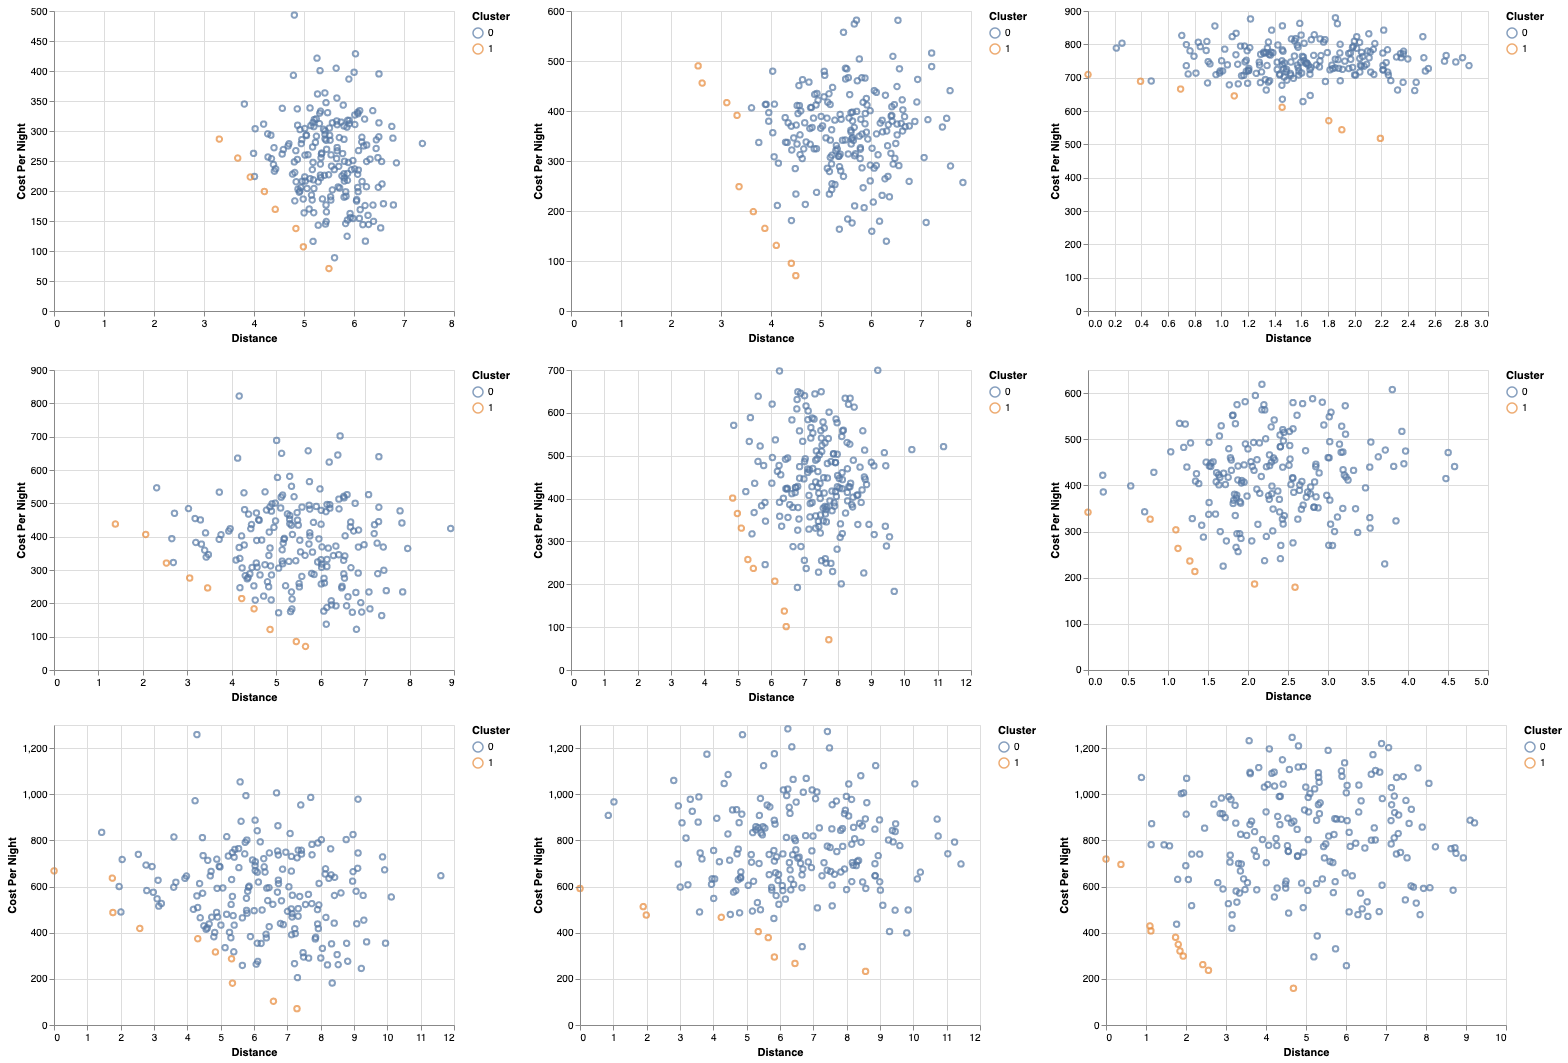

In [32]:
alt.vconcat(*[skye, skym, skyh])

## Linear Regression

Number of clusters: 3 and 4. mix the centroids

### Generation

In [33]:


#Currently creating 3 different random linear regressions, the only difference between them being the seed. 
#If use_seed is true, the charts will use the seeds 'seed_start' through 'seed_start + 2'. Otherwise, they will use a different seed each iteration. 
def createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, setOutlierCategory=False):
  random.seed(10)

  features, output, coef = make_regression(n_samples=samples+outliers, n_features=1, n_informative=1, coef= True, noise=noise, bias=bias, random_state=seed_start if use_seed else None)
  output = output.reshape((samples+outliers, 1))
  data = pd.DataFrame(np.hstack((features, output)), columns=["X", "Y"])

  if setCategory:
    data["Label"] = 0
    for i in range(0, len(data["Label"])): 
        data.loc[i, ('Label')] = random.randint(0, 2)
    
    subject_map = {
      0: "Circle",
      1: "Cross",
      2: "Diamond", 
      3: "Square"
    }

    data['Label'] = data['Label'].map(subject_map)


  if negativeCorrelation:
    data["X"] = data["X"] * -1

  if data["X"].min() < 0:
    data["X"] += abs(data["X"].min())

  if data["Y"].min() < 0:
    data["Y"] += abs(data["Y"].min())

  if outliers > 0:
    maxX = data["X"].max()
    minX = data["X"].min()
      
    maxY = data["Y"].max()
    minY = data["Y"].min()

    for i in range(0, outliers):
      searchIncrement = 0
      while(True):
        searchIncrement += .05

        xVal = random.uniform(minX - searchIncrement, maxX + searchIncrement)
        yVal = random.uniform(minY - searchIncrement, maxY + searchIncrement)
        
        # You could also change the numbers inside of this line to be bigger/smaller than 1 if you want the outliers to be further/closer to the clusters
        if(data.loc[(data["X"] - 1 < xVal) & (data["X"] + 1 > xVal) & (data["Y"] - 55 < yVal) & (data["Y"] + 55 > yVal)].shape[0] == 0):
          data.loc[samples+i, ("X")] = xVal
          data.loc[samples+i, ("Y")] = yVal
          data.loc[samples+i, ("Cluster")] = centerNum
          break

  if data["X"].min() < 0:
    data["X"] += abs(data["X"].min())

  if data["Y"].min() < 0:
    data["Y"] += abs(data["Y"].min())

    
  if setOutlierCategory:
    data["Label"] = 0
    for i in range(0, samples): 
        data.loc[i, ('Label')] = 0
    for i in range(samples, samples+outliers): 
        data.loc[i, ('Label')] = 1
    
    subject_map = {
      0: "In",
      1: "Out"
    }

    data['Label'] = data['Label'].map(subject_map)

  return data



### Easy

In [34]:
#Changeable variables
samples = 200 
noise = 20
bias = 0
use_seed = True
seed_start = 422
negativeCorrelation = True

setCategory = False

outliers = 10

linDataEasy1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linet = alt.Chart(linDataEasy1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)


In [35]:
#Changeable variables
samples = 200 
noise = 20
bias = 0
use_seed = True
seed_start = 424
negativeCorrelation = False

setCategory = False

outliers = 10


linDataEasy2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

line1 = alt.Chart(linDataEasy2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)


In [36]:
#Changeable variables
samples = 200 
noise = 20
bias = 0
use_seed = True
seed_start = 20
negativeCorrelation = False

setCategory = False

outliers = 10


linDataEasy3 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

line2 = alt.Chart(linDataEasy3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)

In [37]:
line = alt.hconcat(*[linet, line1,line2]).resolve_scale(color='independent')

### Medium

In [38]:
#Changeable variables
samples = 200 
noise = 40
bias = 0
use_seed = True
seed_start = 422
negativeCorrelation = False

setCategory = False

outliers = 10


linDataMed1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linmt = alt.Chart(linDataMed1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)


In [39]:
#Changeable variables
samples = 200 
noise = 40
bias = 0
use_seed = True
seed_start = 428
negativeCorrelation = True

setCategory = False

outliers = 10

linDataMed2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linm1 = alt.Chart(linDataMed2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)

In [40]:
#Changeable variables
samples = 200 
noise = 40
bias = 0
use_seed = True
seed_start = 430
negativeCorrelation = True

setCategory = False

outliers = 10


linDataMed3 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linm2 = alt.Chart(linDataMed3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)

In [41]:
linm = alt.hconcat(*[linmt, linm1,linm2]).resolve_scale(color='independent')

### Hard

In [42]:
#Changeable variables
samples = 200 
noise = 100
bias = 0
use_seed = True
seed_start = 422
negativeCorrelation = True

setCategory = False

outliers = 12


linDataHard1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linht = alt.Chart(linDataHard1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)


In [43]:
#Changeable variables
samples = 200 
noise = 60
bias = 0
use_seed = True
seed_start = 25
negativeCorrelation = False

setCategory = False

outliers = 12


linDataHard2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linh1 = alt.Chart(linDataHard2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)


In [44]:
#Changeable variables
samples = 200 
noise = 50
bias = 0
use_seed = True
seed_start = 200
negativeCorrelation = False

setCategory = False

outliers = 12


linDataHard3 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

linh2 = alt.Chart(linDataHard3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"

)


In [45]:
linh = alt.hconcat(*[linht, linh1,linh2]).resolve_scale(color='independent')

## Linear Regression datasets

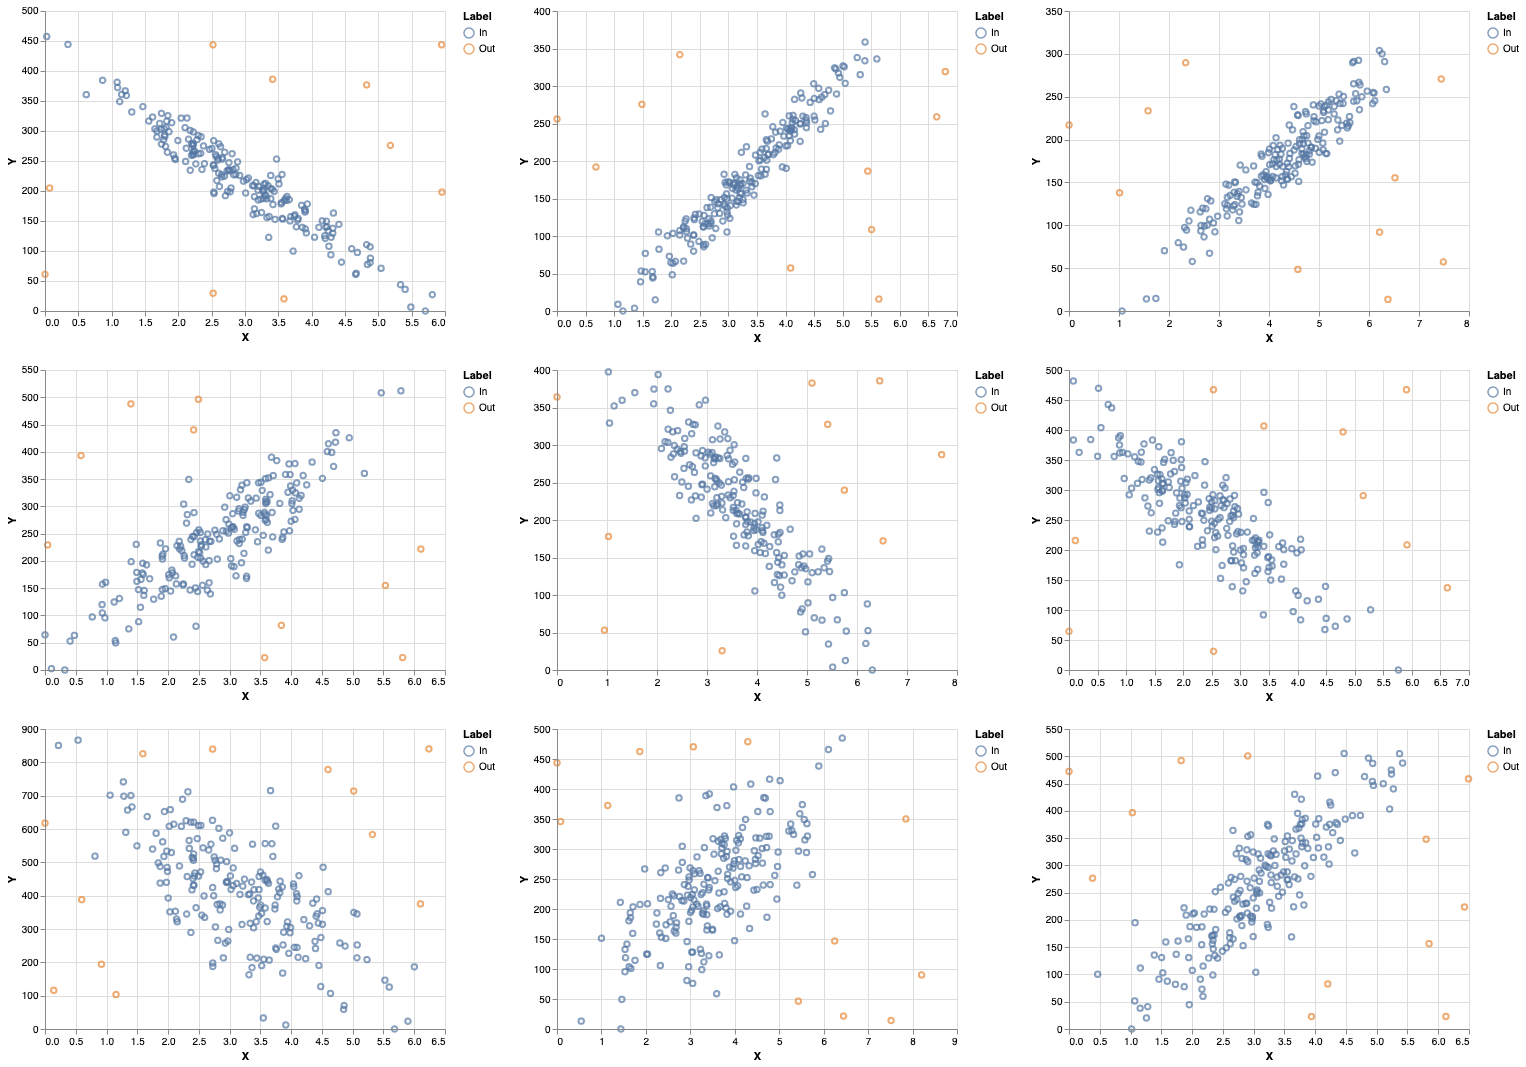

In [46]:
alt.vconcat(*[line, linm, linh])

## Quadratic Regression

Number of clusters: 3 and 4. mix the centroids

### Generation

In [47]:

#### VARIABLES TO BE CHANGED

def createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, set_category, outliers, setOutlierCategory=False, randomSeed=10):
  #Currently creating 3 different random linear regressions, the only difference between them being the seed. 
  #If use_seed is true, the charts will use the seeds 'seed_start' through 'seed_start + 2'. Otherwise, they will use a different seed each iteration. 
  random.seed(randomSeed)
  features, output, coef = make_regression(n_samples=samples + outliers, n_features=1, n_informative=1, coef= True, noise=noise, bias=bias, random_state=seed_start if use_seed else None)
  output = output.reshape((samples+outliers, 1))
  data = pd.DataFrame(np.hstack((features, output)), columns=["X", "Y"])


  data["X"] = abs(data["X"])**x_power
  data["Y"] = abs(data["Y"])**y_power

  if setCategory:
    data["Label"] = 0
    for i in range(0, len(data["Label"])): 
      if(abs(data["X"][i]) < .7):
        data.loc[i, ('Label')] = 0
      elif(abs(data["X"][i]) > 3.5):
        data.loc[i, ('Label')] = 1
      else:
        data.loc[i, ('Label')] = random.randint(0, 2)
    
    subject_map = {
      0: "Circle",
      1: "Cross",
      2: "Diamond", 
      3: "Square"
    }

    data['Label'] = data['Label'].map(subject_map)


  if negativeCorrelation:
    data["X"] = data["X"] * -1

  if outliers > 0:

    maxX = data["X"].max()
    minX = data["X"].min()
      
    maxY = data["Y"].max()
    minY = data["Y"].min()

    for i in range(0, outliers):
      searchIncrement = 0
      while(True):
        searchIncrement += .05

        xVal = random.uniform(minX - searchIncrement, maxX + searchIncrement)
        yVal = random.uniform(minY - searchIncrement, maxY + searchIncrement)
        
        # You could also change the numbers inside of this line to be bigger/smaller than 1 if you want the outliers to be further/closer to the clusters
        if(data.loc[(data["X"] - 1 < xVal) & (data["X"] + 1 > xVal) & (data["Y"] - maxY / 30 < yVal) & (data["Y"] + maxY / 30 > yVal)].shape[0] == 0):
          data.loc[samples+i, ("X")] = xVal
          data.loc[samples+i, ("Y")] = yVal
          break


  if data["X"].min() < 0:
    data["X"] += abs(data["X"].min())

  if data["Y"].min() < 0:
    data["Y"] += abs(data["Y"].min())

  if setOutlierCategory:
    data["Label"] = 0
    for i in range(0, samples): 
        data.loc[i, ('Label')] = 0
    for i in range(samples, samples+outliers): 
        data.loc[i, ('Label')] = 1
    
    subject_map = {
      0: "In",
      1: "Out"
    }

    data['Label'] = data['Label'].map(subject_map)


  return data


### Easy

In [48]:

samples = 200 
noise = 10
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 64
negativeCorrelation = False
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataEasy1 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True, randomSeed=12)

qet = alt.Chart(quadDataEasy1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)


In [49]:
samples = 200 
noise = 10
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 65
negativeCorrelation = True
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataEasy2 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True, randomSeed = 11)

qe1 = alt.Chart(quadDataEasy2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)

In [50]:
samples = 200 
noise = 10
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 64
negativeCorrelation = True
x_power = 1.5
y_power = .5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataEasy3 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True)

qe2 = alt.Chart(quadDataEasy3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label:N"
)


In [51]:
qe = alt.hconcat(*[qet, qe1,qe2]).resolve_scale(color='independent')

### Medium

In [52]:

samples = 200 
noise = 20
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 64
negativeCorrelation = False
x_power = -0.5
y_power = 1
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataMed1 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True, randomSeed = 13)

qmt = alt.Chart(quadDataMed1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"

)



In [53]:
samples = 200 
noise = 15
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 65
negativeCorrelation = True
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataMed2 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True)

qm1 = alt.Chart(quadDataMed2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"

)


In [54]:

samples = 200 
noise = 33
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 68
negativeCorrelation = False
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 9

### END


quadDataMed3 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True, randomSeed = 11)

qm2 = alt.Chart(quadDataMed3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"

)



In [55]:
qm = alt.hconcat(*[qmt, qm1,qm2]).resolve_scale(color='independent')

### Hard

In [56]:

samples = 200 
noise = 25
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 64
negativeCorrelation = False
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 3

### END


quadDataHard1 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True, randomSeed = 3)

qht = alt.Chart(quadDataHard1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)



In [57]:
samples = 200 
noise = 20
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 65
negativeCorrelation = True
x_power = 0.5
y_power = 1.5
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = False

outliers = 5

### END


quadDataHard2 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True)
qh1 = alt.Chart(quadDataHard2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"

)



In [58]:

samples = 200 
noise = 50
bias = 0
use_seed = True
#Seed start 64, 65, 66 are pretty solid versions
seed_start = 66
negativeCorrelation = False
x_power = -0.5
y_power = 1
#If you want to add categories, set to true. Randomly assigns categories to most of the data points, except consistent categories at the tails.
setCategory = True

outliers = 0

### END


quadDataHard3 = createQuadratic(samples, noise, bias, use_seed, seed_start, negativeCorrelation, x_power, y_power, setCategory, outliers, True)

qh2 = alt.Chart(quadDataHard3).mark_point().encode(
  x= "X:Q",
  y= "Y:Q", 
  color="Label:N"
)



In [59]:
qh = alt.hconcat(*[qht, qh1,qh2]).resolve_scale(color='independent')

## Quadratic Regression datasets

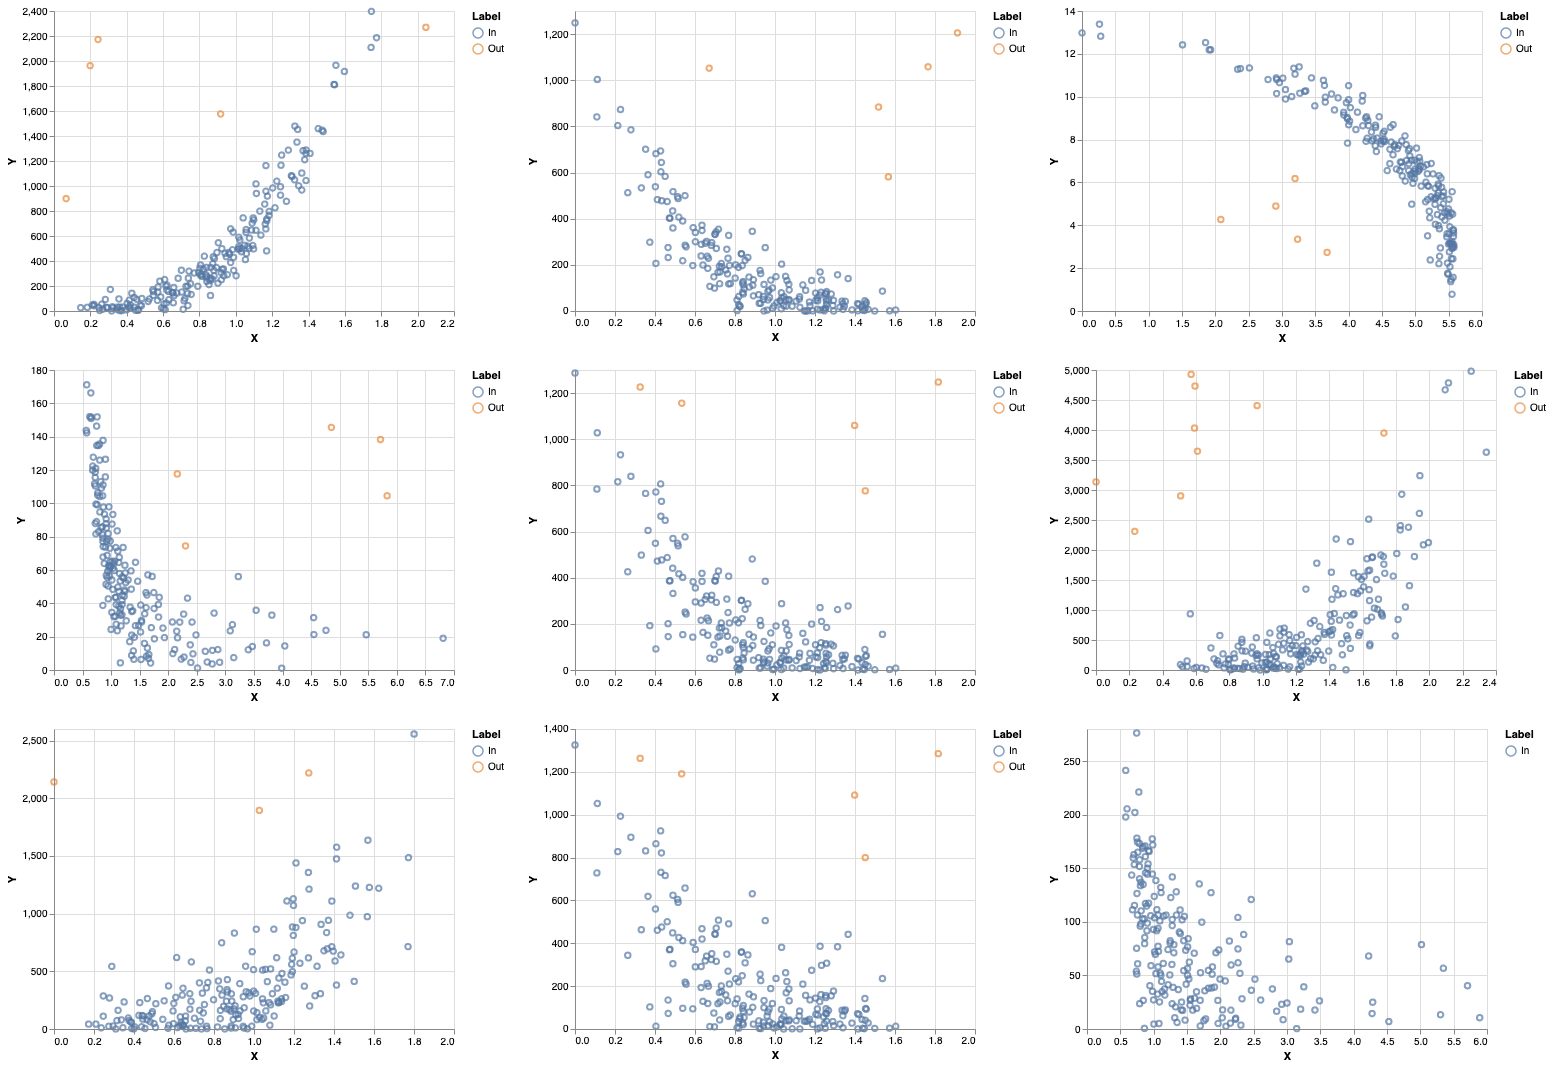

In [60]:
alt.vconcat(*[qe, qm, qh])

## Outliers

Number of clusters: 3 and 4. mix the centroids

### Generation

In [61]:
### VARIABLES TO BE CHANGED

centerNum = 1
samples = 200
stdDev = 1.5
useSeed = True
seedStart = 6
outlierCount = 8
outlierCenters = []
randomSeed = 10

di = {0: "In", 1:"Out"}


### END

def createOutliers(centerNum, samples, stdDev, useSeed, seedStart, rangeFromCenter, outliers=outlierCount, outlierCenters=outlierCenters, randomSeed=randomSeed):
  random.seed(randomSeed)

  x,y = make_blobs(n_samples=samples+outliers, n_features=2, centers=centerNum, cluster_std=stdDev, random_state = seedStart if useSeed else None)
  y = y.reshape((samples+outliers,1))
  data = pd.DataFrame(np.hstack((x,y)), columns=["X", "Y", "Cluster"])

  if outliers > 0:
    if len(outlierCenters) == 0:
      maxX = data["X"].max()
      minX = data["X"].min()
        
      maxY = data["Y"].max()
      minY = data["Y"].min()

      for i in range(0, outliers):
        searchIncrement = 0
        while(True):
          searchIncrement += 5

          xVal = random.uniform(minX - searchIncrement, maxX + searchIncrement)
          yVal = random.uniform(minY - searchIncrement, maxY + searchIncrement)
          
          # You could also change the numbers inside of this line to be bigger/smaller than 1 if you want the outliers to be further/closer to the clusters
          if(data.loc[(data["X"] - rangeFromCenter < xVal) & (data["X"] + rangeFromCenter > xVal) & (data["Y"] - rangeFromCenter < yVal) & (data["Y"] + rangeFromCenter > yVal)].shape[0] == 0):
            data.loc[samples+i, ("X")] = xVal
            data.loc[samples+i, ("Y")] = yVal
            data.loc[samples+i, ("Cluster")] = centerNum
            break
    else:
      for i in range(len(outlierCenters)):
        outlier_data = make_blobs(outliers, 2, 1, 0.2, center_box=outlierCenters[i])
        outlier_data = np.hstack((outlier_data[0], [[centerNum] for x in outlier_data[1]]))
        data = data.append(pd.DataFrame(outlier_data, columns=["X", "Y", "Cluster"]))

    
  data[['Cluster']] = data[['Cluster']].applymap(lambda x: "In" if x < 1 else "Out")

  if data["X"].min() < 0:
    data["X"] += abs(data["X"].min()) + 5

  if data["Y"].min() < 0:
    data["Y"] += abs(data["Y"].min()) + 5


  return data

### Easy

In [62]:
centerNum = 1
samples = 200
stdDev = 1.5
useSeed = True
seedStart = 1
outliers = 4

di = {0: "In", 1:"Out"}

rangeFromCenter=1;

### END

outlierDataEasy1 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart,rangeFromCenter, outliers, randomSeed=11)

outet = alt.Chart(outlierDataEasy1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)


In [63]:
centerNum = 1
samples = 200
stdDev = 1.5
useSeed = True
seedStart = 11
outliers = 5

di = {0: "In", 1:"Out"}
rangeFromCenter=2;


### END

outlierDataEasy2 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart, rangeFromCenter, outliers, randomSeed=25)


oute1 = alt.Chart(outlierDataEasy2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)



In [64]:
centerNum = 1
samples = 200
stdDev = 1
useSeed = True
seedStart = 12
outliers = 3

di = {0: "In", 1:"Out"}

rangeFromCenter=2;


### END

outlierDataEasy3 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart,rangeFromCenter, outliers)

oute2 = alt.Chart(outlierDataEasy3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [65]:
#Changeable variables
samples = 200 
noise = 5
bias = 0
use_seed = True
seed_start = 422
negativeCorrelation = True

setCategory = False

outliers = 5

linOutlierEasy1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

oute3 = alt.Chart(linOutlierEasy1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)


In [66]:
#Changeable variables
samples = 200 
noise = 10
bias = 0
use_seed = True
seed_start = 423
negativeCorrelation = False

setCategory = False

outliers = 4

linOutlierEasy2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

oute4 = alt.Chart(linOutlierEasy2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)

In [67]:
oute = alt.hconcat(*[outet, oute1,oute2, oute3, oute4]).resolve_scale(color='independent')

### Medium

In [68]:
centerNum = 1
samples = 200
stdDev = 1
useSeed = True
seedStart = 1
outliers = 6

di = {0: "In", 1:"Out"}

### END

outlierDataMed1 = createOutliers(centerNum, samples, stdDev, useSeed,1, seedStart, outliers, randomSeed=20)

outmt = alt.Chart(outlierDataMed1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [69]:
centerNum = 1
samples = 200
stdDev = 1
useSeed = True
seedStart = 3
outliers = 7

di = {0: "In", 1:"Out"}

### END

outlierDataMed2 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart,1,  outliers, randomSeed=20)

outm1 = alt.Chart(outlierDataMed2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [70]:
centerNum = 1
samples = 200
stdDev = 1
useSeed = True
seedStart = 4
outliers = 2

di = {0: "In", 1:"Out"}

### END

outlierDataMed3 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart, outliers)

outm2 = alt.Chart(outlierDataMed3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [71]:
#Changeable variables
samples = 200 
noise = 7
bias = 0
use_seed = True
seed_start = 195
negativeCorrelation = True

setCategory = False

outliers = 3

linOutlierMed1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

outm3 = alt.Chart(linOutlierMed1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)

In [72]:
#Changeable variables
samples = 200 
noise = 14
bias = 0
use_seed = True
seed_start = 423
negativeCorrelation = False

setCategory = False

outliers = 7

linOutlierMed2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

outm4 = alt.Chart(linOutlierMed2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)

In [73]:
outm = alt.hconcat(*[outmt, outm1,outm2, outm3, outm4]).resolve_scale(color='independent')

### Hard

In [74]:
centerNum = 1
samples = 200
stdDev = 4
useSeed = True
seedStart = 1
outliers = 20

di = {0: "In", 1:"Out"}

### END

outlierDataHard1 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart, 3, outliers, randomSeed=22)

outht = alt.Chart(outlierDataHard1).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [75]:
centerNum = 1
samples = 200
stdDev = 5
useSeed = True
seedStart = 4
outliers = 17

di = {0: "In", 1:"Out"}

### END

outlierDataHard2 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart, 5, outliers)

outh1 = alt.Chart(outlierDataHard2).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [76]:
centerNum = 1
samples = 200
stdDev = 5
useSeed = True
seedStart = 3
outliers = 22

di = {0: "In", 1:"Out"}

### END

outlierDataHard3 = createOutliers(centerNum, samples, stdDev, useSeed, seedStart, 5, outliers, randomSeed=12)

outh2 = alt.Chart(outlierDataHard3).mark_point().encode(
    x="X:Q",
    y="Y:Q",
    color="Cluster:N"
)

In [77]:
#Changeable variables
samples = 200 
noise = 25
bias = 0
use_seed = True
seed_start = 80
negativeCorrelation = True

setCategory = False

outliers = 20

linOutlierHard1 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

outh3 = alt.Chart(linOutlierHard1).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)

In [78]:
#Changeable variables
samples = 200 
noise = 30
bias = 0
use_seed = True
seed_start = 90
negativeCorrelation = False

setCategory = False

outliers = 15

linOutlierHard2 = createLinear(samples, noise, bias, use_seed, seed_start, negativeCorrelation, setCategory, outliers, True)

outh4 = alt.Chart(linOutlierHard2).mark_point().encode(
  x= "X:Q",
  y= "Y:Q",
  color="Label"
)

In [79]:
outh = alt.hconcat(*[outht, outh1,outh2, outh3, outh4]).resolve_scale(color='independent')

## Outlier datasets

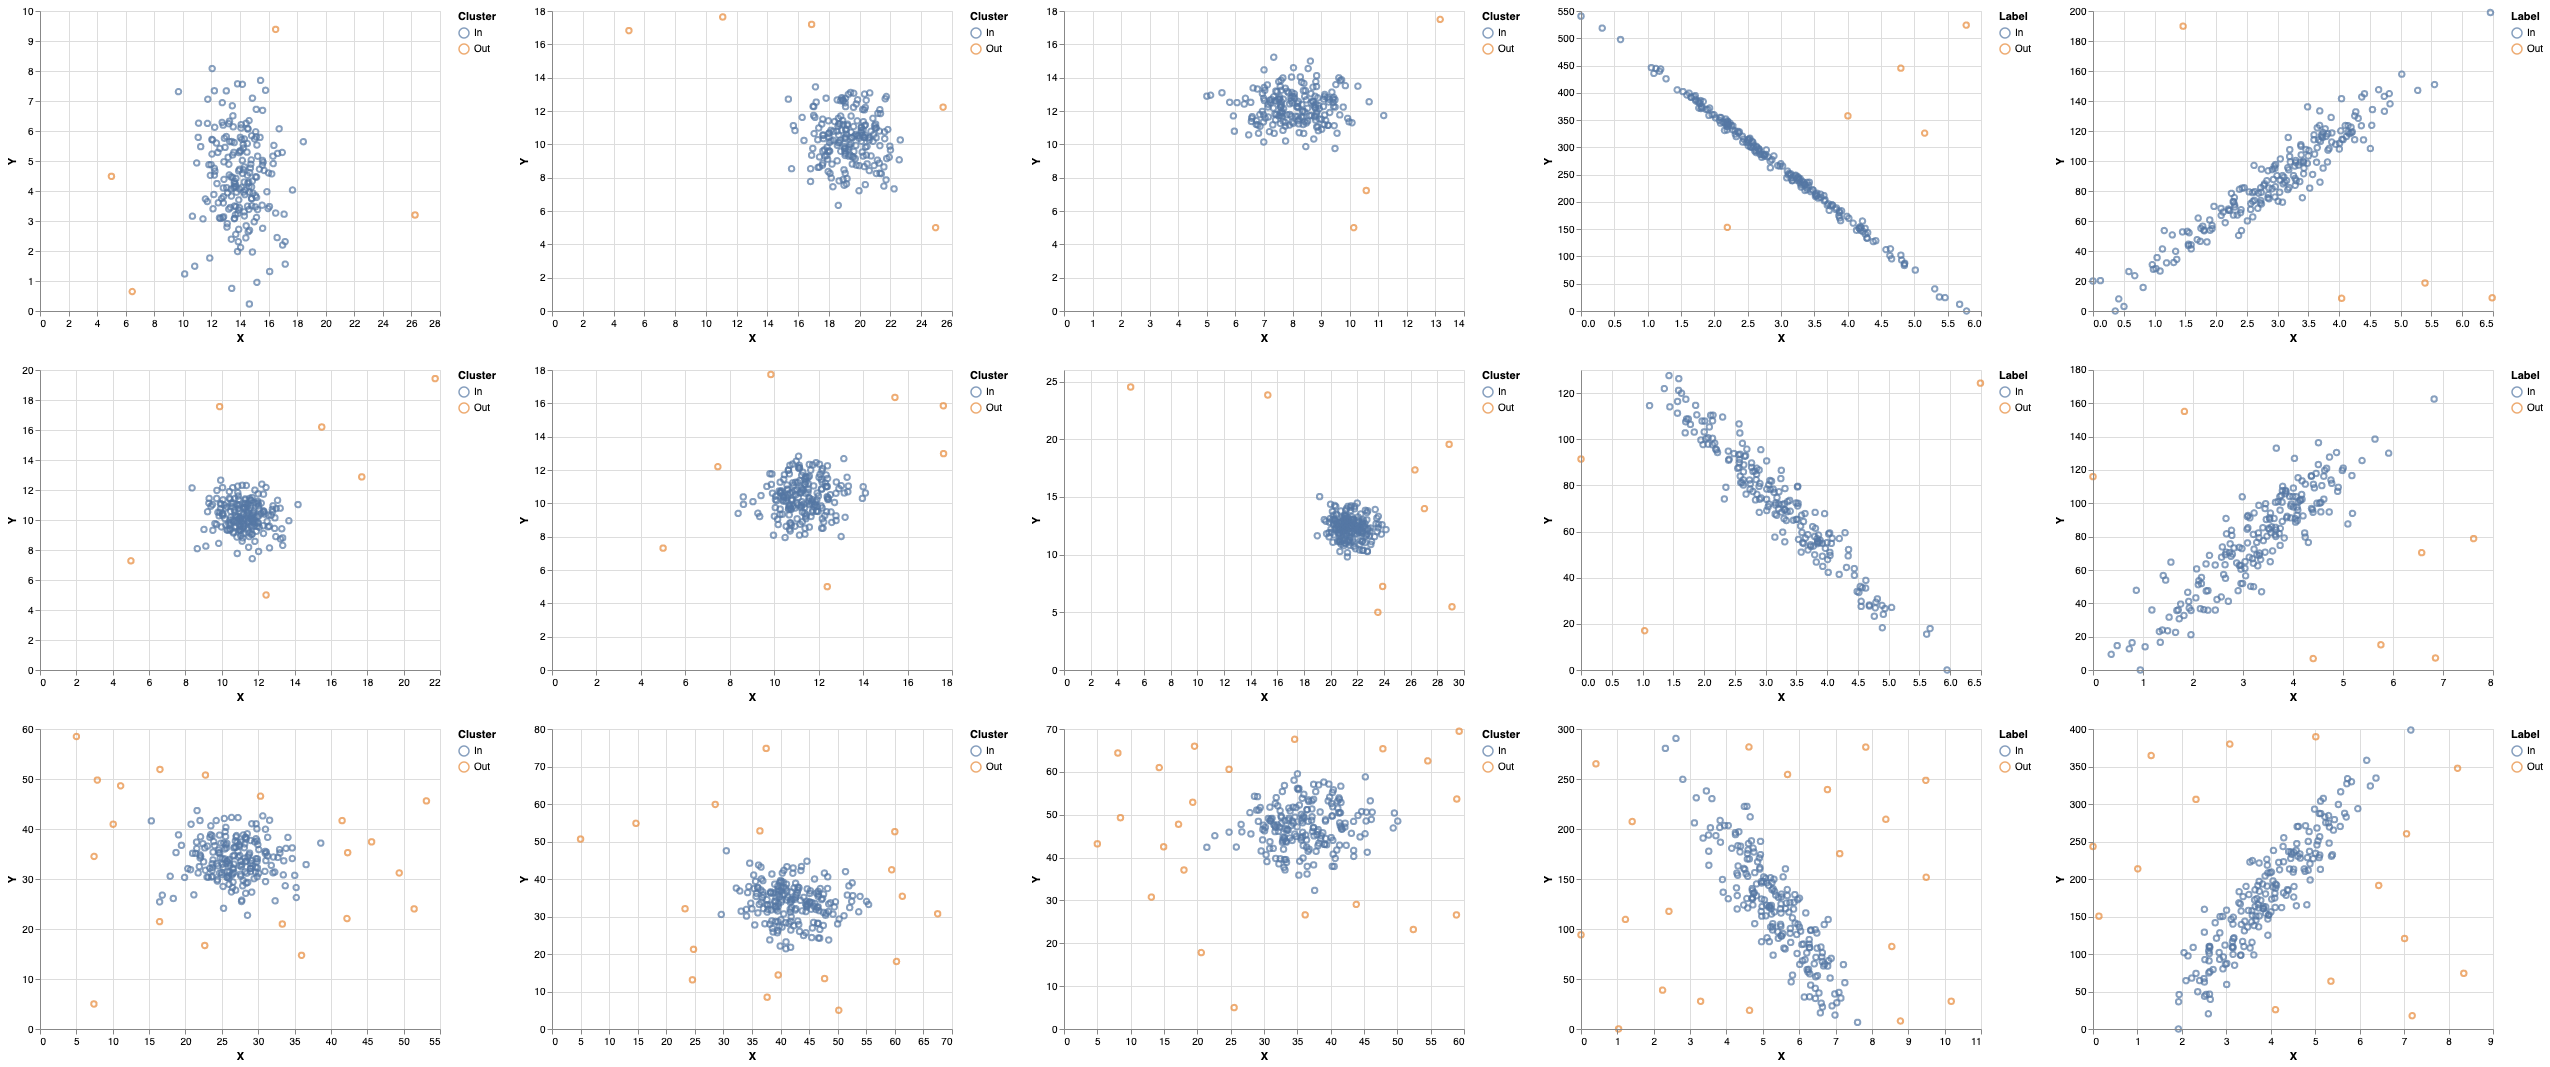

In [80]:
alt.vconcat(*[oute, outm, outh])